# Обучение и подбор параметров для PCA и SVR
Для обучения используется данные с headhunter'a из файла [hhNewImporved.csv]()

In [29]:
import pandas as pd
import numpy as np
import pickle
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm  import SVR
from matplotlib import pyplot as plt

In [30]:
all_data = pd.read_csv('./some path to/hhNewImproved.csv')
X = all_data.drop("Salary",axis = 1).as_matrix()
y = np.log(all_data['Salary'].values)

In [32]:
param = {
    "C" : [0.1,10,100],
    "epsilon" : [0.1,0.01,0.001]
}
error = []
answer = []

for i in range(1,30):
    
    X = all_data.drop("Salary",axis = 1)
    pca = PCA(n_components = i)
    X = pca.fit_transform(X)
    svr = SVR()
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.1,random_state = 1234)
    gsc = GridSearchCV(svr,param).fit(Xtrain,Ytrain)
    answ = gsc.best_estimator_.predict(Xtest)
    er = mean_squared_error(Ytest,answ)
    error.append(er)
    print("end of {} iteration best GS params {}".format(i,gsc.best_params_))

end of 1 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 2 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 3 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 4 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 5 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 6 iteration best GS params {'epsilon': 0.001, 'C': 100}
end of 7 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 8 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 9 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 10 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 11 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 12 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 13 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 14 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 15 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 16 iteration best GS params {'epsilon': 0.1, 'C': 100}
end of 17 itera

# График зависимости размерности PCA разложения от MSE

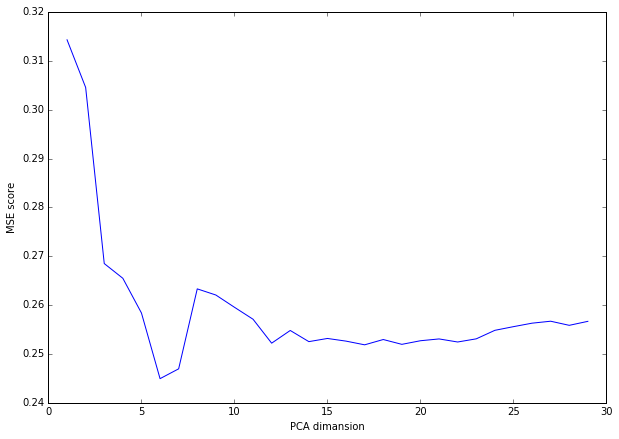

(0.24494560530791473, 6)

In [44]:
plt.figure(figsize = (10,7))
plt.xlabel("PCA dimansion")
plt.ylabel("MSE score")
plt.plot(range(1,30),error)
plt.show()

np.min(error),np.argmin(error)+1

In [34]:
X = all_data.drop("Salary",axis = 1).as_matrix()
pca = PCA(n_components = 6)
X = pca.fit_transform(X)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.1,random_state = 1234)
svr = SVR(C = 100,epsilon= 0.001).fit(Xtrain,Ytrain)

In [35]:
mean_squared_error(Ytest,svr.predict(Xtest))

0.24498477782331132

# Сохранение обученных моделей в файл

In [36]:
with open('data.pickle', 'wb') as f:
    pickle.dump(svr, f)
with open('pca.pickle', 'wb') as f:
    pickle.dump(pca, f)